<a href="https://colab.research.google.com/github/Arko2016/MyAnalyisInPython/blob/master/Gradient_Descent_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Data Ingestion

In [131]:
url = 'https://raw.githubusercontent.com/Arko2016/Datasets/master/gradientdescent_inputdata.csv'
data = pd.read_csv(url)
data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


Define a class for linear regression

The class should have methods for followng tasks:


1. define x, y and coefficient weights. here, x is independent variable and y is dependent variable
2. generate predicted values for y
3. create a plot for line of best fit using predicted and actual values of y
4. calculate cost
5. update coefficients 
6. calculate accuracy




In [0]:
#define global variables for storing intercept and coefficients
#these will be updated in the below class methods
inter,co = 0,0

In [0]:
class linear_regression():
  #method 1
  def __init__(self,x,y):
    self.x = x
    self.y = y
    #set seed
    np.random.seed(123)
    #assign random starting values for coefficients 
    self.b = np.random.rand(2).tolist()
  
  #method 2
  def get_preds(self,x=[]):
    if not x:
      x = self.x
    #get coefficients
    b = self.b
    #define an empty array for storing predictions
    y_preds = np.array([])
    #generate and append predicted values for each value of x
    for X in x:
      y_preds = np.append(y_preds, b[0] + (b[1] * X))
    return y_preds
  
  #method 3
  def plot_bestfit(self,y_preds,title):
    f = plt.figure()
    plt.scatter(self.x,self.y,color = "blue")
    plt.plot(self.x,y_preds,color = "green")
    plt.title(title)
    f.show()
  
  #method 4
  def calc_cost(self,y_preds):
    #get number of obsv
    m = len(self.y)
    cost = (1/(2 * m)) * (np.sum(y_preds - self.y)**2)
    return cost
  
  #method 5
  def update_coeffs(self,learning_rate):
    y = self.y
    y_preds = self.get_preds()
    #get number of obsv
    m = len(self.y)
    
    #update intercept
    grade_b0 =  (1/m) * np.sum(y_preds - y)
    step_b0 = grade_b0 * learning_rate
    self.b[0] = self.b[0] - step_b0
    
    #update coefficient 
    grade_b1 =  (1/m) * np.sum((y_preds - y) * self.x)
    step_b1 = grade_b1 * learning_rate
    self.b[1] = self.b[1] - step_b1
    
    #store the values of intercept and coefficient
    global inter
    inter = self.b[0]
    global co
    co = self.b[1]
  
  #method 6
  def calc_acc(self,y_preds):
    p, e = y_preds, self.y
    n = len(e)
    return 1 - sum([abs(p[i] - e[i])/e[i] for i in range(n) if e[i] != 0])/n


Define a main method to invoke linear regression class and perform operations

Accuracy: 0.7760972012602605
do you want to continue?(y/*)y
Accuracy: 0.7744871354328218
do you want to continue?(y/*)y
Accuracy: 0.7744758226531114
do you want to continue?(y/*)n
Intercept: 180921.14457123508, Coefficient: 56275.60376438771


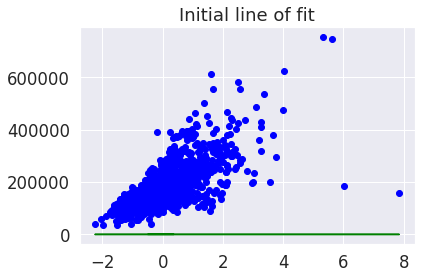

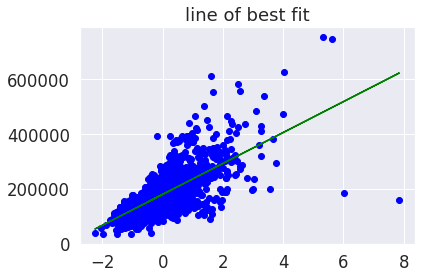

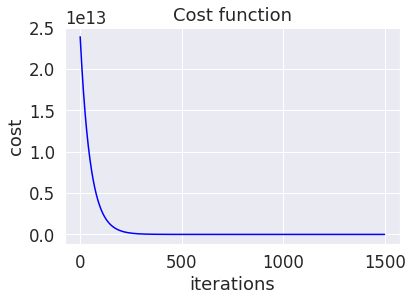

In [134]:
def main():
  #x = np.array([i for i in range(11)])
  #y = np.array([2*i for i in range(11)])

  #get x and y values from dataset
  x = np.array(data['GrLivArea'])
  #standardize the predictor variable values
  x = (x - x.mean())/x.std()
  y = np.array(data['SalePrice'])
  
  #create object for regression class
  obj = linear_regression(x,y)
  
  #generate initial set of predictions and plot
  y_preds = obj.get_preds()
  obj.plot_bestfit(y_preds,"Initial line of fit")
  
  #define input parameters
  learning_rate = 0.01
  iterations = 0
  steps = 500
  costs = []

  while 1:
    #generate predictions
    y_preds = obj.get_preds()
    #calculate cost
    cost = obj.calc_cost(y_preds)
    #append to list for costs
    costs.append(cost)
    #update intercept and coefficients
    obj.update_coeffs(learning_rate)
    #increment iterations
    iterations += 1
    #stopping criteria
    if iterations % steps == 0:
      acc = obj.calc_acc(y_preds)
      print("Accuracy: {}".format(acc))
      cond = input("do you want to continue?(y/*)")
      if cond != 'y':
        break
  
  #plot line of best fit
  obj.plot_bestfit(y_preds,"line of best fit")
  print("Intercept: {}, Coefficient: {}".format(inter, co))

  #plot cost function against interations - show gradient descent
  f = plt.figure()
  plt.plot(range(iterations),costs,color = "blue")
  plt.title("Cost function")
  plt.xlabel("iterations")
  plt.ylabel("cost")
  plt.show()
      
if __name__ == '__main__':
  main()